In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx import *
import random
from scipy.spatial.distance import pdist, squareform
from networkx.algorithms.approximation import min_weighted_dominating_set
from itertools import product  
# from age_calculation import *

# from networkx.algorithms.approximation import dominating_set
from parameters import *
# from create_graph_1 import *
from itertools import combinations
import pickle

%matplotlib inline  


In [2]:
def running_mean(x): #, N = 5):
    N = 100
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

### exp 1 : 8 users under 1 UAV . With no packet loss. State = {t, AoI_UAV, AoI_BS}. sample on generation


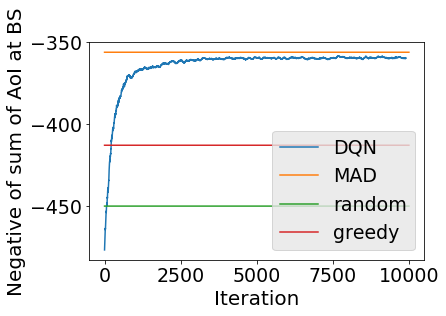

MAD = 356.0, greedy = 412.90185, DQN = 364.20001220703125, random = 450.14186


In [3]:
# 8 users
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/paper_results/exp1/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


dqn_8U_final = pickle.load(open(path_RP + "8U_dqn_overall.pickle", "rb"))
MAD_8U_final = pickle.load(open(path_RP + "8U_mad_overall.pickle", "rb"))
random_8U_final = pickle.load(open(path_RP + "8U_random_overall.pickle", "rb"))
greedy_8U_final = pickle.load(open(path_RP + "8U_greedy_overall.pickle", "rb"))


dqn_8U_final = dqn_8U_final[8]
MAD_mean_8 = np.mean(MAD_8U_final[8])
random_mean_8_min = np.mean(random_8U_final[8])
random_mean_8_max = np.max(random_8U_final[8])
greedy_mean_8 = np.mean(greedy_8U_final[8])
random_mean_8 = np.mean(random_8U_final[8])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_8U_final), label = "DQN")
# ax1.plot(running_mean(dqn_8U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_8]*len(dqn_8U_final), label = "MAD")
ax1.plot([-random_mean_8]*len(dqn_8U_final), label = "random")
ax1.plot([-greedy_mean_8]*len(dqn_8U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('8 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f"MAD = {np.mean(MAD_8U_final[8])}, greedy = {np.mean(greedy_8U_final[8])}, DQN = {-np.mean(dqn_8U_final[-5:])}, random = {np.mean(random_8U_final[8])}")



### exp 2 : 8 users under 1 UAV . With packet loss. State = {t, AoI_UAV, AoI_BS}. sample on generation


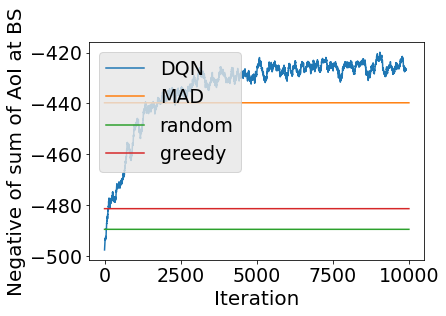

MAD = 439.76225, greedy = 481.4553, DQN = 431.20001220703125, random = 489.58911

DQN sample success =  0.66
DQN update success =  0.6

MAD sample success =  0.62
MAD update success =  0.52

greedy sample success =  0.62
greedy update success =  0.52

random sample success =  0.67
random update success =  0.55


In [4]:
# 8 users
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/paper_results/exp2/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


dqn_8U_final = pickle.load(open(path_RP + "8U_dqn_overall.pickle", "rb"))
MAD_8U_final = pickle.load(open(path_RP + "8U_mad_overall.pickle", "rb"))
random_8U_final = pickle.load(open(path_RP + "8U_random_overall.pickle", "rb"))
greedy_8U_final = pickle.load(open(path_RP + "8U_greedy_overall.pickle", "rb"))


dqn_8U_final = dqn_8U_final[8]
MAD_mean_8 = np.mean(MAD_8U_final[8])
random_mean_8_min = np.mean(random_8U_final[8])
random_mean_8_max = np.max(random_8U_final[8])
greedy_mean_8 = np.mean(greedy_8U_final[8])
random_mean_8 = np.mean(random_8U_final[8])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_8U_final), label = "DQN")
# ax1.plot(running_mean(dqn_8U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_8]*len(dqn_8U_final), label = "MAD")
ax1.plot([-random_mean_8]*len(dqn_8U_final), label = "random")
ax1.plot([-greedy_mean_8]*len(dqn_8U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('8 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f"MAD = {np.mean(MAD_8U_final[8])}, greedy = {np.mean(greedy_8U_final[8])}, DQN = {-np.mean(dqn_8U_final[-5:])}, random = {np.mean(random_8U_final[8])}")

#### PDR for exp2

## DQN
dqn_attempt_sample_8U = pickle.load(open(path_RP + "8U_dqn_attempt_sample.pickle", "rb"))
dqn_attempt_update_8U = pickle.load(open(path_RP + "8U_dqn_attempt_update.pickle", "rb"))
dqn_success_sample_8U = pickle.load(open(path_RP + "8U_dqn_success_sample.pickle", "rb"))
dqn_success_update_8U = pickle.load(open(path_RP + "8U_dqn_success_update.pickle", "rb"))
print("\nDQN sample success = ", round(np.mean(dqn_success_sample_8U[-5:])/np.mean(dqn_attempt_sample_8U[-5:]),2))
print("DQN update success = ", round(np.mean(dqn_success_update_8U[-5:])/np.mean(dqn_attempt_update_8U[-5:]),2))

## MAD
mad_attempt_sample_8U = pickle.load(open(path_RP + "8U_mad_attempt_sample.pickle", "rb"))
mad_attempt_update_8U = pickle.load(open(path_RP + "8U_mad_attempt_update.pickle", "rb"))
mad_success_sample_8U = pickle.load(open(path_RP + "8U_mad_success_sample.pickle", "rb"))
mad_success_update_8U = pickle.load(open(path_RP + "8U_mad_success_update.pickle", "rb"))
print("\nMAD sample success = ", round(np.mean(mad_success_sample_8U)/np.mean(mad_attempt_sample_8U),2))
print("MAD update success = ", round(np.mean(mad_success_update_8U)/np.mean(mad_attempt_update_8U),2))

## greedy
greedy_attempt_sample_8U = pickle.load(open(path_RP + "8U_greedy_attempt_sample.pickle", "rb"))
greedy_attempt_update_8U = pickle.load(open(path_RP + "8U_greedy_attempt_update.pickle", "rb"))
greedy_success_sample_8U = pickle.load(open(path_RP + "8U_greedy_success_sample.pickle", "rb"))
greedy_success_update_8U = pickle.load(open(path_RP + "8U_greedy_success_update.pickle", "rb"))
print("\ngreedy sample success = ", round(np.mean(greedy_success_sample_8U)/np.mean(greedy_attempt_sample_8U),2))
print("greedy update success = ", round(np.mean(greedy_success_update_8U)/np.mean(greedy_attempt_update_8U),2))

## random
random_attempt_sample_8U = pickle.load(open(path_RP + "8U_random_attempt_sample.pickle", "rb"))
random_attempt_update_8U = pickle.load(open(path_RP + "8U_random_attempt_update.pickle", "rb"))
random_success_sample_8U = pickle.load(open(path_RP + "8U_random_success_sample.pickle", "rb"))
random_success_update_8U = pickle.load(open(path_RP + "8U_random_success_update.pickle", "rb"))
print("\nrandom sample success = ", round(np.mean(random_success_sample_8U)/np.mean(random_attempt_sample_8U),2))
print("random update success = ", round(np.mean(random_success_update_8U)/np.mean(random_attempt_update_8U),2))




### exp 3 : 8,10 users under multiple UAV . With no packet loss. State = {t, AoI_UAV, AoI_BS}. sample on generation


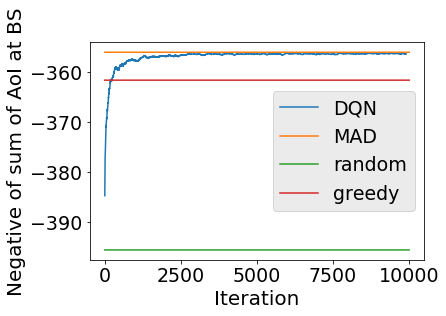

 8 users - MAD = 356, greedy = 361.58093, DQN = 356.79998779296875, random = 395.52219


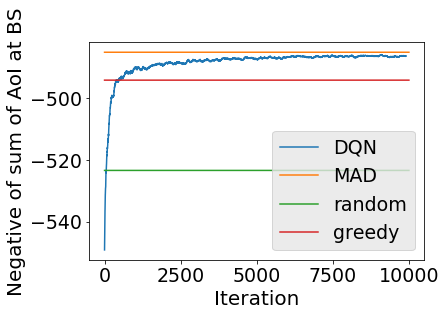

 10 users - MAD = 485, greedy = 494.06421, DQN = 486.6000061035156, random = 523.39133


In [5]:
# 8 users
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7//paper_results/exp3/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"

# ##########################################  8 users

dqn_8U_final = pickle.load(open(path_RP + "8U_dqn_overall.pickle", "rb"))
MAD_8U_final = pickle.load(open(path_RP + "8U_mad_overall.pickle", "rb"))
random_8U_final = pickle.load(open(path_RP + "8U_random_overall.pickle", "rb"))
greedy_8U_final = pickle.load(open(path_RP + "8U_greedy_overall.pickle", "rb"))


dqn_8U_final = dqn_8U_final[8]
MAD_mean_8 = np.min(MAD_8U_final[8])
random_mean_8_min = np.mean(random_8U_final[8])
random_mean_8_max = np.max(random_8U_final[8])
greedy_mean_8 = np.mean(greedy_8U_final[8])
random_mean_8 = np.mean(random_8U_final[8])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_8U_final), label = "DQN")
# ax1.plot(running_mean(dqn_8U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_8]*len(dqn_8U_final), label = "MAD")
ax1.plot([-random_mean_8]*len(dqn_8U_final), label = "random")
ax1.plot([-greedy_mean_8]*len(dqn_8U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('8 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f" 8 users - MAD = {np.min(MAD_8U_final[8])}, greedy = {np.mean(greedy_8U_final[8])}, DQN = {-np.mean(dqn_8U_final[-5:])}, random = {np.mean(random_8U_final[8])}")

# ##########################################  10 users

dqn_10U_final = pickle.load(open(path_RP + "10U_dqn_overall.pickle", "rb"))
MAD_10U_final = pickle.load(open(path_RP + "10U_mad_overall.pickle", "rb"))
random_10U_final = pickle.load(open(path_RP + "10U_random_overall.pickle", "rb"))
greedy_10U_final = pickle.load(open(path_RP + "10U_greedy_overall.pickle", "rb"))


dqn_10U_final = dqn_10U_final[10]
MAD_mean_10 = np.min(MAD_10U_final[10])
random_mean_10_min = np.mean(random_10U_final[10])
random_mean_10_max = np.max(random_10U_final[10])
greedy_mean_10 = np.mean(greedy_10U_final[10])
random_mean_10 = np.mean(random_10U_final[10])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_10U_final), label = "DQN")
# ax1.plot(running_mean(dqn_10U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_10]*len(dqn_10U_final), label = "MAD")
ax1.plot([-random_mean_10]*len(dqn_10U_final), label = "random")
ax1.plot([-greedy_mean_10]*len(dqn_10U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('10 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()

print(f" 10 users - MAD = {np.min(MAD_10U_final[10])}, greedy = {np.mean(greedy_10U_final[10])}, DQN = {-np.mean(dqn_10U_final[-5:])}, random = {np.mean(random_10U_final[10])}")

### exp 4

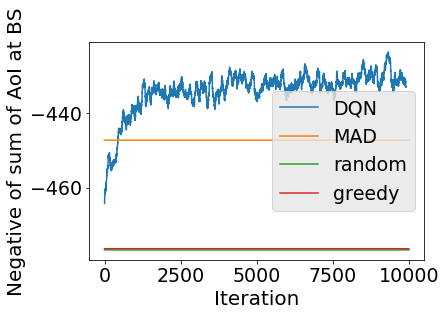

 8 users - MAD = 447.23119, greedy = 476.44728, DQN = 430.79998779296875, random = 476.77704


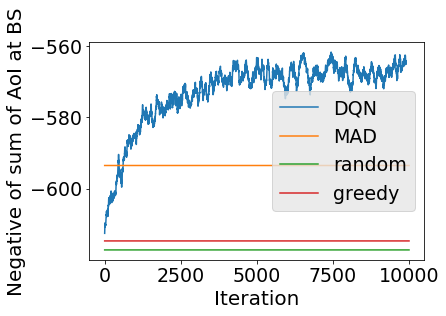

 10 users - MAD = 593.53995, greedy = 614.65336, DQN = 569.2000122070312, random = 617.16921


In [6]:
# 10 users
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/paper_results/exp4/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"

# ##########################################  8 users

dqn_8U_final = pickle.load(open(path_RP + "8U_dqn_overall.pickle", "rb"))
MAD_8U_final = pickle.load(open(path_RP + "8U_mad_overall.pickle", "rb"))
random_8U_final = pickle.load(open(path_RP + "8U_random_overall.pickle", "rb"))
greedy_8U_final = pickle.load(open(path_RP + "8U_greedy_overall.pickle", "rb"))


dqn_8U_final = dqn_8U_final[8]
MAD_mean_8 = np.mean(MAD_8U_final[8])
random_mean_8_min = np.mean(random_8U_final[8])
random_mean_8_max = np.max(random_8U_final[8])
greedy_mean_8 = np.mean(greedy_8U_final[8])
random_mean_8 = np.mean(random_8U_final[8])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_8U_final), label = "DQN")
# ax1.plot(running_mean(dqn_8U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_8]*len(dqn_8U_final), label = "MAD")
ax1.plot([-random_mean_8]*len(dqn_8U_final), label = "random")
ax1.plot([-greedy_mean_8]*len(dqn_8U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('8 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f" 8 users - MAD = {np.mean(MAD_8U_final[8])}, greedy = {np.mean(greedy_8U_final[8])}, DQN = {-np.mean(dqn_8U_final[-5:])}, random = {np.mean(random_8U_final[8])}")

# ##########################################  10 users

dqn_10U_final = pickle.load(open(path_RP + "10U_dqn_overall.pickle", "rb"))
MAD_10U_final = pickle.load(open(path_RP + "10U_mad_overall.pickle", "rb"))
random_10U_final = pickle.load(open(path_RP + "10U_random_overall.pickle", "rb"))
greedy_10U_final = pickle.load(open(path_RP + "10U_greedy_overall.pickle", "rb"))


dqn_10U_final = dqn_10U_final[10]
MAD_mean_10 = np.mean(MAD_10U_final[10])
random_mean_10_min = np.mean(random_10U_final[10])
random_mean_10_max = np.max(random_10U_final[10])
greedy_mean_10 = np.mean(greedy_10U_final[10])
random_mean_10 = np.mean(random_10U_final[10])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_10U_final), label = "DQN")
# ax1.plot(running_mean(dqn_10U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_10]*len(dqn_10U_final), label = "MAD")
ax1.plot([-random_mean_10]*len(dqn_10U_final), label = "random")
ax1.plot([-greedy_mean_10]*len(dqn_10U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('10 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f" 10 users - MAD = {np.mean(MAD_10U_final[10])}, greedy = {np.mean(greedy_10U_final[10])}, DQN = {-np.mean(dqn_10U_final[-5:])}, random = {np.mean(random_10U_final[10])}")



In [7]:

path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_6/exp_4/exp7_disc99/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"

DQN_preference_8U = pickle.load(open(path_RP + "8U_DQN_preference.pickle", "rb"))




FileNotFoundError: [Errno 2] No such file or directory: '/home/biplav/AoI/UAV_results/multi_UAV_Age_6/exp_4/exp7_disc99/RP/8U_DQN_preference.pickle'

In [ ]:
DQN_pref_avg = {}
for i in DQN_preference_8U.keys():
    DQN_pref_avg[i] = np.sum(DQN_preference_8U[i][-100:])

DQN_pref_avg_sorted = {k: v for k, v in sorted(DQN_pref_avg.items(), key=lambda item: item[1])}

print(DQN_pref_avg_sorted)

In [ ]:
actions = [[[38], [38, 40, 37, 39, 36, 42, 43]], [[38], [38, 41, 37, 39, 36, 42, 43]], [[38], [40, 41, 37, 39, 36, 42, 43]], [[40], [38, 40, 37, 39, 36, 42, 43]], [[40], [38, 41, 37, 39, 36, 42, 43]], [[40], [40, 41, 37, 39, 36, 42, 43]], [[41], [38, 40, 37, 39, 36, 42, 43]], [[41], [38, 41, 37, 39, 36, 42, 43]], [[41], [40, 41, 37, 39, 36, 42, 43]], [[37], [38, 40, 37, 39, 36, 42, 43]], [[37], [38, 41, 37, 39, 36, 42, 43]], [[37], [40, 41, 37, 39, 36, 42, 43]], [[39], [38, 40, 37, 39, 36, 42, 43]], [[39], [38, 41, 37, 39, 36, 42, 43]], [[39], [40, 41, 37, 39, 36, 42, 43]], [[36], [38, 40, 37, 39, 36, 42, 43]], [[36], [38, 41, 37, 39, 36, 42, 43]], [[36], [40, 41, 37, 39, 36, 42, 43]], [[42], [38, 40, 37, 39, 36, 42, 43]], [[42], [38, 41, 37, 39, 36, 42, 43]], [[42], [40, 41, 37, 39, 36, 42, 43]], [[43], [38, 40, 37, 39, 36, 42, 43]], [[43], [38, 41, 37, 39, 36, 42, 43]], [[43], [40, 41, 37, 39, 36, 42, 43]]] 

update_loss = {38: 0.22, 40: 0.59, 41: 0.81, 37: 0.01, 39: 0.81, 36: 0.7, 42: 0.34, 43: 0.16}
sampling_loss = {38: 0.96, 40: 0.34, 41: 0.09, 37: 0.1, 39: 0.85, 36: 0.6, 42: 0.81, 43: 0.73}

best_actions  = [10,9]
worst_actions = [0, 1]

In [ ]:
sampled_users_best  = []
updated_users_best  = []
for i in best_actions:
    # print(f"i = {i}")
    sampled_users_best.extend(actions[i][1])
    updated_users_best.extend(actions[i][0])

sampled_users_worst  = []
updated_users_worst  = []
for j in worst_actions:
    # print(f"j = {j}")
    sampled_users_worst.extend(actions[j][1])
    updated_users_worst.extend(actions[j][0])



In [ ]:
print(f"sampled_users_best = {np.unique(sampled_users_best)}")
print(f"updated_users_best = {np.unique(updated_users_best)}")
print(f"sampled_users_worst = {np.unique(sampled_users_worst)}")
print(f"updated_users_worst = {np.unique(updated_users_worst)}")

In [ ]:
path = "/home/biplav/AoI/multi_UAV_Age_6/models/2020-12-09 23:40/"
path_RP = path + "RP/"

arr1 = pickle.load(open(path_RP + "8U_greedy_attempt_update.pickle", "rb"))
arr2 = pickle.load(open(path_RP + "8U_greedy_success_update.pickle", "rb"))
arr3 = pickle.load(open(path_RP + "8U_greedy_attempt_sample.pickle", "rb"))
arr4 = pickle.load(open(path_RP + "8U_greedy_success_sample.pickle", "rb"))

print(f"arr1 = {arr1}")
print(f"arr2 = {arr2}")
print(f"arr3 = {arr3}")
print(f"arr4 = {arr4}")



In [ ]:
import math
def val(step, decay_steps):
    # step = math.ceil(step, decay_steps)
    decay_steps = decay_steps * math.ceil(step / decay_steps)

    y =  ((initial_learning_rate - end_learning_rate) * (1-step/decay_steps)**(power)) + end_learning_rate
    return y

x = [i for i in range(1, 1_000_000)]
initial_learning_rate = 0.2
end_learning_rate = 0.01
power = 1
decay_steps = 20_000
y = []
for i in x:
    y.append(val(i, decay_steps))

import matplotlib.pyplot as plt
plt.plot(y)
